In [1]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import article

/home/ildefonso/anaconda3/envs/tweetynet/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ildefonso/anaconda3/envs/tweetynet/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
config_dir = Path('../../src/configs/')
config_files = config_dir.glob('*BirdsongRecognition*ini')
config_files = sorted([config_file for config_file in config_files])

data_dir = Path('../../data/')
test_dirs = data_dir / 'BirdsongRecognition'
test_dirs = test_dirs.glob('Bird*/')
test_dirs = sorted([test_dir for test_dir in test_dirs])

csv_fname = str(Path('../../results/BirdsongRecognition_test.csv'))

In [3]:
birdsong_rec_df = article.util.make_df_birdsong_rec(config_files, test_dirs, 
                          net_name='TweetyNet', csv_fname=csv_fname, train_set_durs=[60, 120, 480])
agg_df = article.util.agg_df_birdsong_rec(birdsong_rec_df, [60, 120, 480])

In [4]:
sns.set_style("dark")

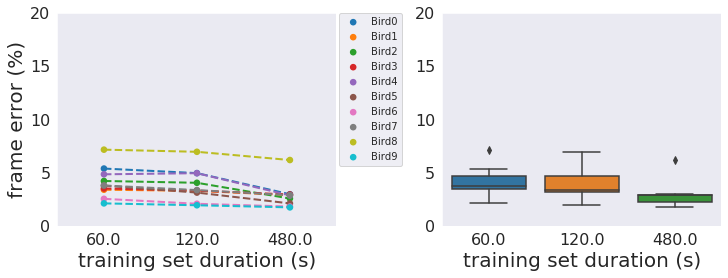

In [5]:
save_as = 'frame_error_vak_talk.png'
ax = article.plot.frame_error(agg_df, xlabel=True, save_as=save_as)

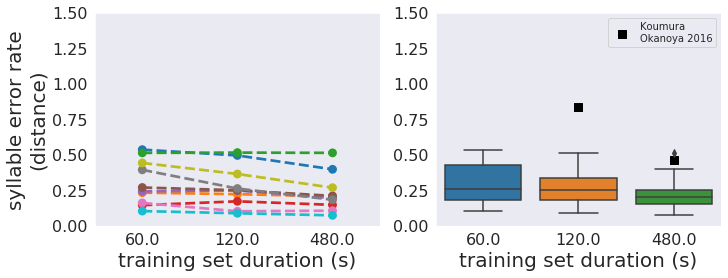

In [6]:
save_as = 'syllable_error_rate_vak_talk.png'
ax = article.plot.syllable_error_rate(agg_df, save_as=save_as)

In [50]:
train_set_dur = 60
bfsong_df = article.util.make_df_bf_song_repository(train_set_dur=train_set_dur)

In [51]:
bfsong_df['frame_error_test_pct'] = bfsong_df['frame_error_test'] * 100

In [62]:
def across_days(df, train_set_dur, ax=None, figsize=(12, 5), save_as=None, transparent=True):
    if ax is None:
        fig, ax = plt.subplots(1, 2, constrained_layout=True)
        fig.set_size_inches(figsize)

    ax = ax.ravel()

    sns.pointplot(x="test_dir_daynum", y="frame_error_test_pct",
                  hue="animal_ID", data=df,
                  linestyles=['--' for _ in df.animal_ID.unique()],
                  ax=ax[0])
    ax[0].set_ylim([0., 20.])
    ax[0].set_ylabel('frame error (%)', fontsize=20)
    ax[0].set_xlabel('day', fontsize=20)
    ax[0].tick_params(labelsize=16)
    
    sns.pointplot(x="test_dir_daynum", y="syllable_error_test",
                  hue="animal_ID", data=df,
                  linestyles=['--' for _ in df.animal_ID.unique()],
                  ax=ax[1])
    ax[1].set_ylim([0., 1.5])
    ax[1].set_ylabel('syllable error rate\n(distance)', fontsize=20)
    ax[1].set_xlabel('day', fontsize=20)
    ax[1].tick_params(labelsize=16)

    fig.suptitle(
        f'performance across days\nof models trained with first {train_set_dur} seconds of song',
        fontsize=24
    );

    if save_as:
        fig.savefig(save_as, transparent=transparent)

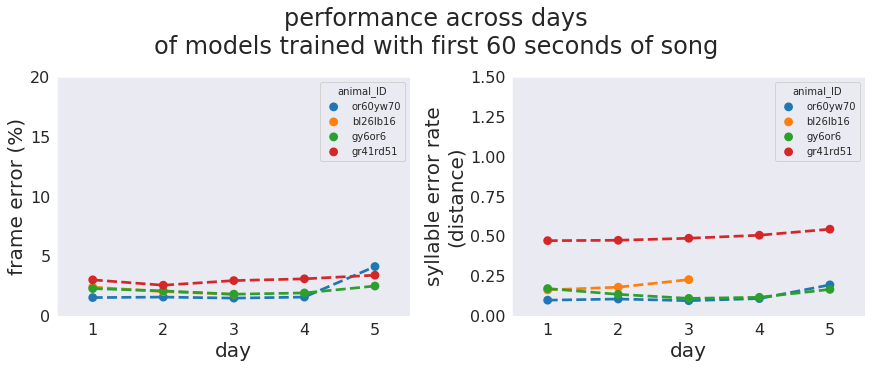

In [63]:
across_days(bfsong_df, train_set_dur, save_as='across_days_vak_talk.png')